<a href="https://colab.research.google.com/github/9Pawel3/Data-Science-and-Machine-Learning/blob/main/Multiple_models_Health_insurance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

path = '/content/insurance.csv'

df = pd.read_csv(path)

In [5]:
# Evaluate the dataframe
df.shape
df.info()
df.isnull().sum()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [37]:
df.head()

# We need to swap categorical data to numerical data and I won't consider region column

df['sex'].unique()
df['sex'] = df['sex'].replace({'female' : 0, 'male' : 1})

df['smoker'].unique()
df['smoker'] = df['smoker'].replace({'yes' : 1, 'no' : 0})

df


,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [44]:
# Split data into attributes and target

X = df.drop(['charges'], axis=1)

y = df['charges']

In [45]:
X

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [49]:
# Split data into test/train sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

In [29]:
# Import models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [50]:
# Train the models
lr = LinearRegression()
lr.fit(X_train, y_train)

svm = SVR()
svm.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

In [61]:
# Predictions on test data
y_pred1 = lr.predict(X_test)

y_pred2 = svm.predict(X_test)

y_pred3 = rf.predict(X_test)

y_pred4 = gr.predict(X_test)

df_test = pd.DataFrame({'Actual' : y_test, 'LinearRegression' : y_pred1,
                       'SVM' : y_pred2, 'RandomForest' : y_pred3, 'GradiantBoost' : y_pred4})

df_test

,Actual,LinearRegression,SVM,RandomForest,GradiantBoost
1099,3227.12110,5789.952131,9251.383482,7491.803755,4987.184832
759,36307.79830,28401.562012,9235.719862,37585.727634,36926.981310
215,7371.77200,11434.611916,9349.504439,8007.381932,7986.422832
903,8125.78450,12149.590262,9405.871029,11622.613166,10872.404573
989,14571.89080,24456.077270,9247.549258,15315.644097,18519.693636
...,...,...,...,...,...
408,6652.52880,6110.707325,9321.427597,7316.721529,6659.363801
466,13224.69300,13056.826743,9466.802152,20187.604146,15208.648574
724,10106.13425,9990.746629,9408.374326,17835.027526,11308.450014
693,2352.96845,1602.250523,9245.242165,4422.552740,3686.017161


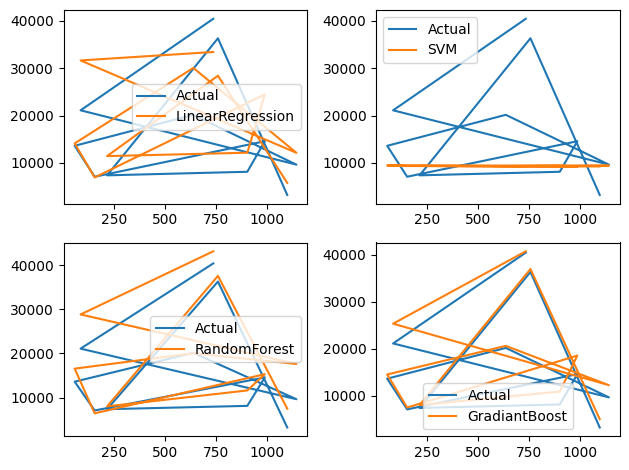

In [64]:
# Find the best model based on the visualing models performance

import matplotlib.pyplot as plt

plt.subplot(221)
plt.plot(df_test['Actual'].iloc[0:11], label='Actual')
plt.plot(df_test['LinearRegression'].iloc[0:11], label='LinearRegression')
plt.legend()

plt.subplot(222)
plt.plot(df_test['Actual'].iloc[0:11], label='Actual')
plt.plot(df_test['SVM'].iloc[0:11], label='SVM')
plt.legend()

plt.subplot(223)
plt.plot(df_test['Actual'].iloc[0:11], label='Actual')
plt.plot(df_test['RandomForest'].iloc[0:11], label='RandomForest')
plt.legend()

plt.subplot(224)
plt.plot(df_test['Actual'].iloc[0:11], label='Actual')
plt.plot(df_test['GradiantBoost'].iloc[0:11], label='GradiantBoost')
plt.legend()

plt.tight_layout()

**Model 3 and 4 seem to have the closest values to the targets**

In [67]:
# Evaluate the algorithms
from sklearn import metrics

score_lr = metrics.r2_score(y_test, y_pred1)
score_svm = metrics.r2_score(y_test, y_pred2)
score_rf = metrics.r2_score(y_test, y_pred3)
score_gb = metrics.r2_score(y_test, y_pred4)

#Remarks
print('Score for linear regression model is:', score_lr)
print('Score for svm model is:', score_svm)
print('Score for random forest model is:', score_rf)
print('Score for gradiant boost model is:', score_gb)

Score for linear regression model is: 0.7318775053160518
Score for svm model is: -0.08960893775902967
Score for random forest model is: 0.8337031745925644
Score for gradiant boost model is: 0.8511597928886855


In [70]:
# Predict insurance based on my data

pawelh = {'age': 29,
          'sex' : 1,
          'bmi' : 25.20,
          'children' : 0,
          'smoker' : 0,
          }

dfpawelh = pd.DataFrame(pawelh, index=[0])

myinsurance = gr.predict(dfpawelh)
print(myinsurance)

[4772.36536781]
